In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the data

First the data is imported from the following github rpository

In [11]:

url = 'https://raw.githubusercontent.com/krishnaik06/AQI-Project/master/Data/Real-Data/Real_Combine.csv'
df = pd.read_csv(url, error_bad_lines=False)
df=df.dropna(axis=0, how='any')
df

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...
1088,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9,288.416667
1089,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2,256.833333
1090,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8,169.000000
1091,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667


# Splitting into Feature and Target variable


In [12]:

X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

# Normalizing the data

In [13]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

# transform data
X= sc_x.fit_transform(X)
y=sc_y.fit_transform(y.values.reshape(-1,1))


# Splitting into train and test

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.explained_variance_ratio_


X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)

X_train

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

In [17]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

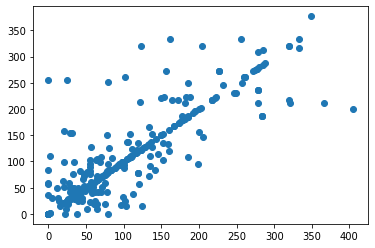

In [18]:
prediction=regressor.predict(X_test)

plt.scatter(sc_y.inverse_transform(y_test),sc_y.inverse_transform(prediction))


In [19]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(sc_y.inverse_transform(y_test), sc_y.inverse_transform(prediction)))

MSE: 2111.3223147971717
